In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import os
from os import listdir
import pickle

# Imports
import numpy as np
import pandas as pd
import cv2 as cv

from skimage import io
from PIL import Image
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from glob import glob
# Visualization
import matplotlib.pyplot as plt

#keras
import keras
from keras.preprocessing.image  import img_to_array, ImageDataGenerator, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
#from keras.applications.xception import Xception, preprocess_input, decode_predictions
from keras.models import Sequential


# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.feature import greycomatrix, greycoprops
from skimage import io

# Notebook magic
%matplotlib inline

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
data = "E:/projects/PlantVillage"

In [5]:
#EDA
len(os.listdir(data+"/train"))

38

In [6]:
from keras.layers import Dense, Flatten
from keras.models import Model
import keras

In [7]:
base_model = VGG19(input_shape=(256,256,3),weights="imagenet",include_top= False)

In [8]:
for layer in base_model.layers:
  layer.trainable = False

In [9]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [10]:
x = Flatten()(base_model.output)

x = Dense(units=38, activation="softmax")(x)


#Creating Model
model = Model(base_model.input, x)

In [11]:
model.compile(optimizer= "adam", loss= keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)      

In [13]:
train = ImageDataGenerator( preprocessing_function=preprocess_input,shear_range = 0.3,zoom_range = 0.2, horizontal_flip = True,,fill_mode="constant" )

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
train_mod = train.flow_from_directory(directory= data+"/train",target_size=(256,256),batch_size=32,class_mode = 'categorical')

val = train.flow_from_directory(directory= data+"/val",target_size=(256,256),batch_size=32,class_mode = 'categorical')

Found 43444 images belonging to 38 classes.
Found 10861 images belonging to 38 classes.


In [15]:
t_img, label = train_mod.next()

In [16]:
t_img.shape

(32, 256, 256, 3)

In [17]:
def pltimage(img_arr, label):

  for im , l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


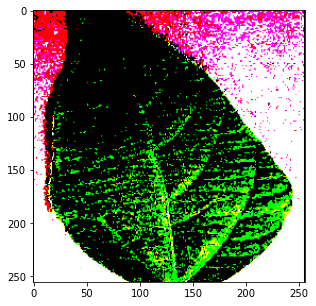

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


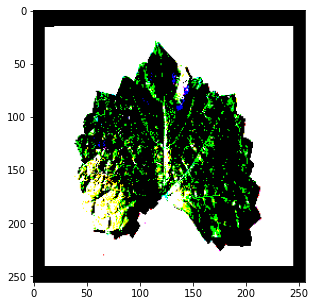

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


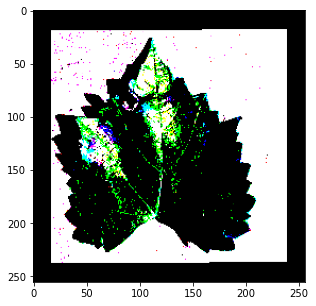

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


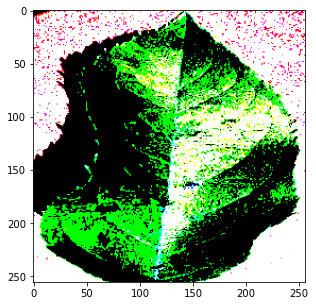

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


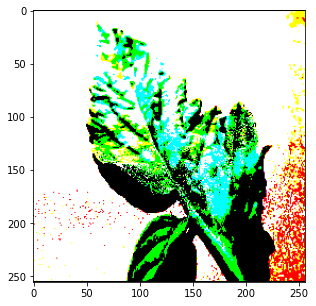

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


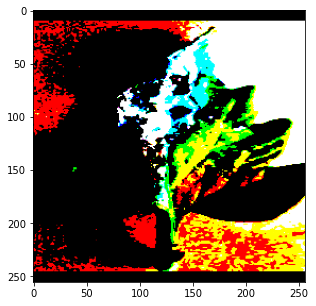

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


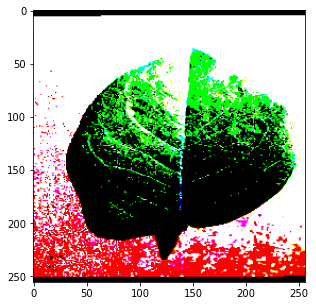

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


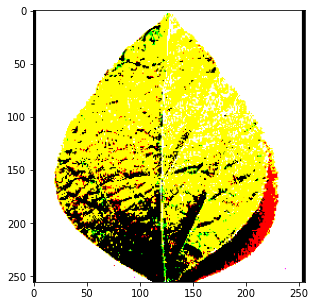

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


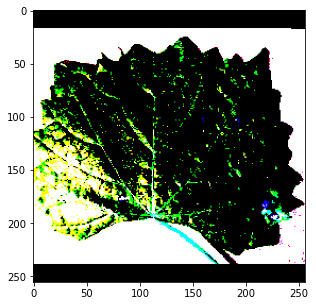

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


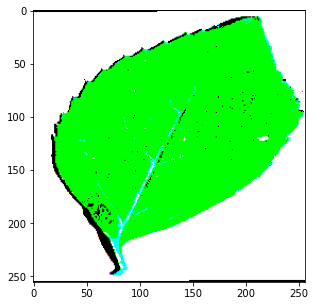

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


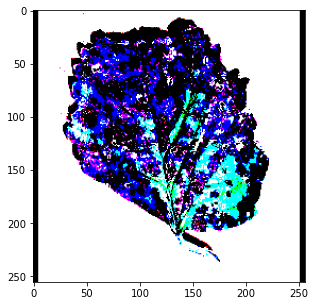

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


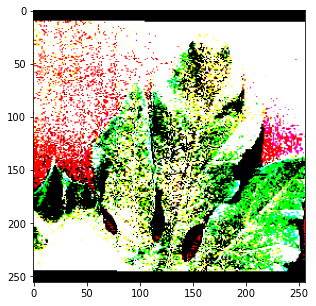

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


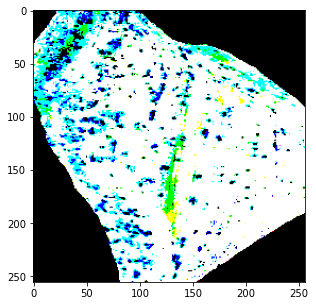

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


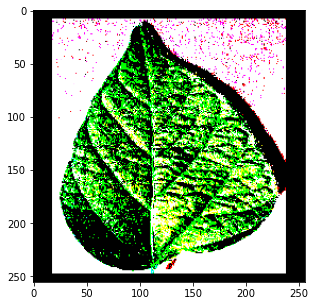

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


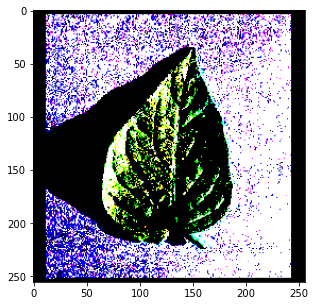

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


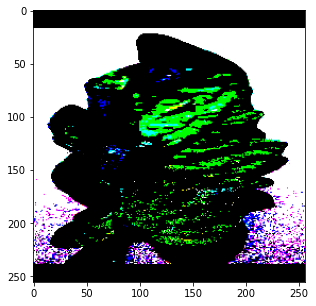

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


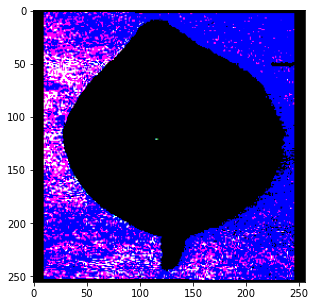

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


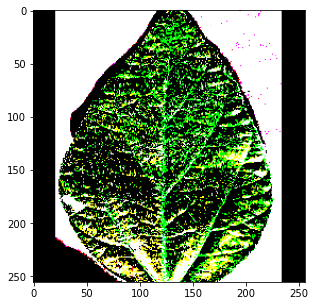

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


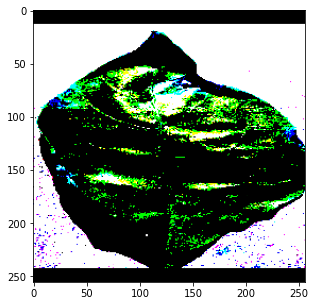

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


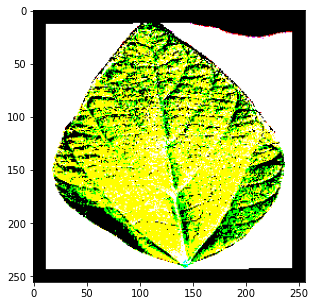

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


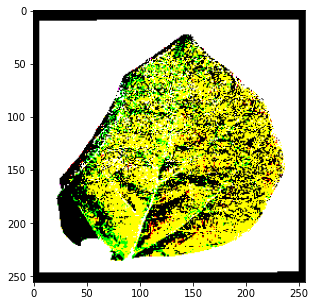

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


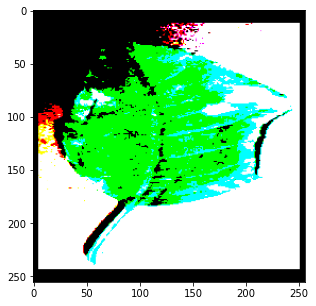

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


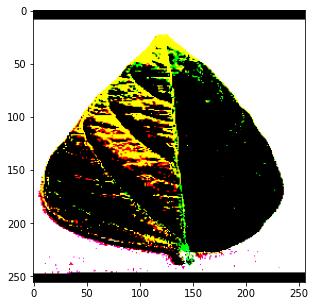

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


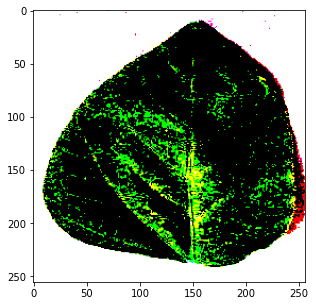

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


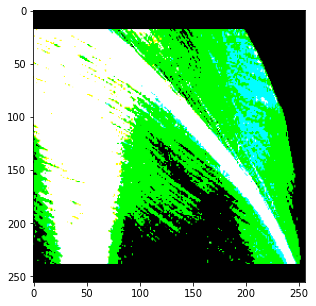

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


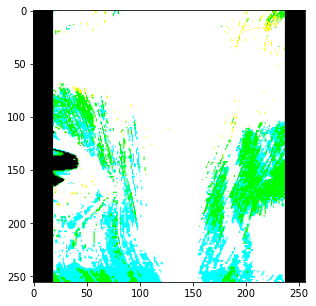

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


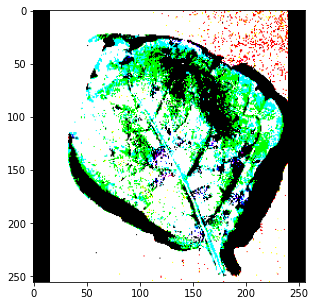

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


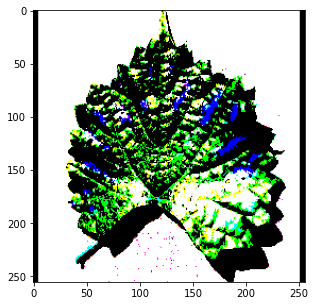

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


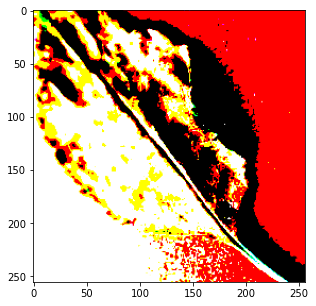

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


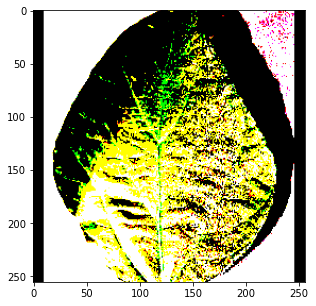

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


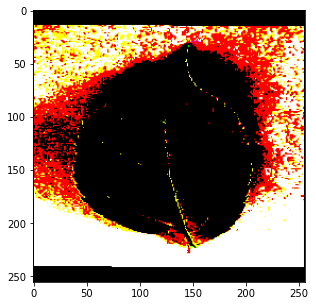

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


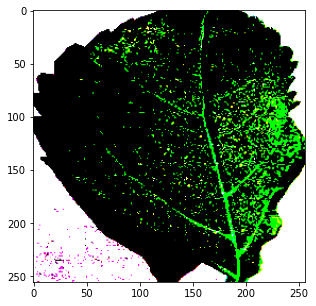

In [18]:
pltimage(t_img, label)

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#early stoping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01,patience=3,verbose=2 )

#model checkpoint
mod_check = ModelCheckpoint(filepath="best_model.h5",monitor="val_accuracy", min_delta=0.01,patience=2,verbose=1,save_best_only=True )


cb = [es, mod_check]

In [20]:
his = model.fit_generator(train_mod, steps_per_epoch=38,epochs= 50,verbose=1, callbacks=cb,validation_data = val, validation_steps=38 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 11.3647 - accuracy: 0.5090
Epoch 00001: val_accuracy improved from -inf to 0.72122, saving model to best_model.h5
38/38 [==============================] - 72s 2s/step - loss: 11.3647 - accuracy: 0.5090 - val_loss: 5.1416 - val_accuracy: 0.7212
Epoch 2/50
38/38 [==============================] - ETA: 0s - loss: 4.8584 - accuracy: 0.7574
Epoch 00002: val_accuracy improved from 0.72122 to 0.75493, saving model to best_model.h5
38/38 [==============================] - 71s 2s/step - loss: 4.8584 - accuracy: 0.7574 - val_loss: 5.6011 - val_accuracy: 0.7549
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 4.7542 - accuracy: 0.7919
Epoch 00003: val_accuracy improved from 0.75493 to 0.77549, saving model to best_model.h5
38/38 [==============================] - 74s 2s/step - loss: 4.7542 - accuracy: 0.7919 - val_loss: 4.9038 - val_acc

In [20]:
h = his.history
h.keys()

NameError: name 'his' is not defined

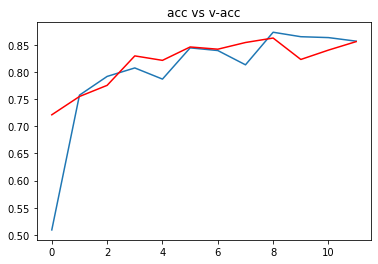

In [22]:
plt.plot(h["accuracy"])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

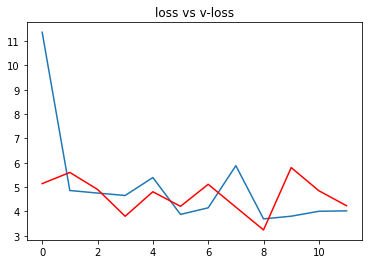

In [23]:
plt.plot(h["loss"])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [21]:
from keras.models import load_model

model = load_model("E:/projects/best_model.h5")

In [22]:
acc= model.evaluate_generator(val)[1]

print(acc*100)

Instructions for updating:
Please use Model.evaluate, which supports generators.
86.22594475746155


In [3]:
def prediction(path):
  img = load_img(path,target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im,axis=0)
  pred1 = model.predict(img)
  pred = np.argmax(model.predict(img))
  print(img.shape)
  print(pred)
  print(pred1)


In [23]:
train_mod.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [12]:
path = "E:/projects/archive/test/test/PotatoEarlyBlight5.JPG"

prediction(path)

(1, 256, 256, 3)
20
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
from tensorflow import lite

In [14]:
tf.keras.models.save_model(model,"best_model.h5")

convert = tf.lite.TFLiteConverter.from_keras_model(model)

convert.optimizations = [tf.lite.Optimize.DEFAULT]
convert.target_spec.supported_types = [tf.float32]


tflite =convert.convert()
open("best_model.tflite","wb").write(tflite)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\UNDERW~1\AppData\Local\Temp\tmpr4i_9h3j\assets


85089396

In [15]:
inter = tf.lite.Interpreter(model_path = "E:/projects/best_model2.tflite")
inter.allocate_tensors()
input_details = inter.get_input_details()
output_details = inter.get_output_details()

input_img = load_img(path)
input_img = img_to_array(input_img)
input_shape = input_details[0]["index"]
print(input_img.shape)
print("\n \n")
print(input_details)
print("\n \n")
print(output_details)

(256, 256, 3)

 

[{'name': 'input_1', 'index': 0, 'shape': array([  1, 256, 256,   3]), 'shape_signature': array([ -1, 256, 256,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

 

[{'name': 'Identity', 'index': 50, 'shape': array([ 1, 38]), 'shape_signature': array([-1, 38]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [16]:
input_img = img_to_array(input_img)

print(input_img.shape)

(256, 256, 3)


In [17]:
img = input_img.reshape((1,input_img.shape[0],input_img.shape[1],input_img.shape[2]))

print(img.shape)


(1, 256, 256, 3)


In [18]:
from time import time

In [22]:
#Image path = "E:/projects/archive/test/test/PotatoEarlyBlight5.JPG"
inter.set_tensor(input_shape,img)

time_before = time()
inter.invoke()
time_after = time()

total = time_after - time_before

print("time taken is ",total)#In seconds

time taken is  0.5778408050537109


In [23]:
output_data = inter.get_tensor(output_details[0]["index"])
print(output_data)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.9676456e-38 1.3621066e-15 1.0000000e+00 0.0000000e+00 2.1255755e-32
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
